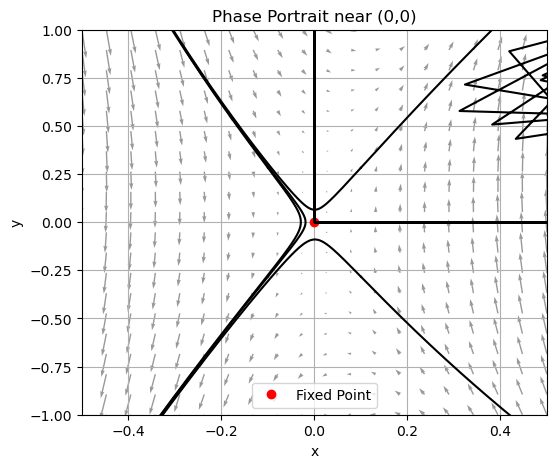

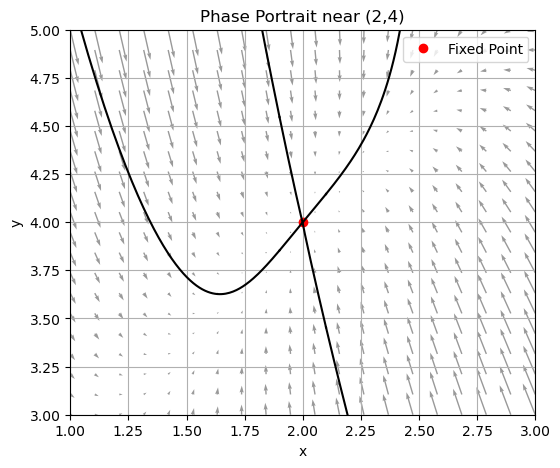

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of ODEs
def system(vars, t):
    x, y = vars
    dxdt = y - x**2
    dydt = 8*x - y**2
    return [dxdt, dydt]

# Function to plot the phase portrait near a given fixed point
def plot_near_fixed_point(x_star, y_star, eigenvectors, 
                          x_range, y_range, title_str):
    # Create a mesh grid around the fixed point
    x_vals = np.linspace(x_star + x_range[0], x_star + x_range[1], 20)
    y_vals = np.linspace(y_star + y_range[0], y_star + y_range[1], 20)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Compute the vector field
    dX = Y - X**2
    dY = 8*X - Y**2

    # Plot the vector field
    plt.figure(figsize=(6,5))
    plt.quiver(X, Y, dX, dY, color='gray', alpha=0.8)
    plt.plot(x_star, y_star, 'ro', label='Fixed Point')

    # Function to integrate and plot trajectories
    def plot_trajectory(x0, y0, tmax=2, n=200):
        t_span = np.linspace(0, tmax, n)
        sol_forward = odeint(system, [x0, y0], t_span)
        sol_backward = odeint(system, [x0, y0], -t_span)
        plt.plot(sol_forward[:,0], sol_forward[:,1], 'k-')
        plt.plot(sol_backward[:,0], sol_backward[:,1], 'k-')

    # Plot trajectories along eigenvector directions from the fixed point
    # We'll pick initial conditions slightly displaced along the eigenvector directions.
    for v in eigenvectors:
        # A small scalar to start near the fixed point
        epsilon = 0.1
        ic_plus = [x_star + epsilon*v[0], y_star + epsilon*v[1]]
        ic_minus = [x_star - epsilon*v[0], y_star - epsilon*v[1]]
        plot_trajectory(ic_plus[0], ic_plus[1])
        plot_trajectory(ic_minus[0], ic_minus[1])

    plt.xlim(x_star + x_range[0], x_star + x_range[1])
    plt.ylim(y_star + y_range[0], y_star + y_range[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title_str)
    plt.grid(True)
    plt.legend()
    plt.show()

# Fixed point (0,0) and its eigenvectors
fp1 = (0,0)
eigs_fp1 = [
    np.array([1, 2*np.sqrt(2)]),
    np.array([1, -2*np.sqrt(2)])
]
plot_near_fixed_point(fp1[0], fp1[1], eigs_fp1,
                      x_range=(-0.5, 0.5), y_range=(-1,1),
                      title_str='Phase Portrait near (0,0)')

# Fixed point (2,4) and its eigenvectors
fp2 = (2,4)
eigs_fp2 = [
    np.array([1, -2 + 2*np.sqrt(3)]),
    np.array([1, -2 - 2*np.sqrt(3)])
]
plot_near_fixed_point(fp2[0], fp2[1], eigs_fp2,
                      x_range=(-1,1), y_range=(-1,1),
                      title_str='Phase Portrait near (2,4)')

In [7]:
5 - 0.625

4.375

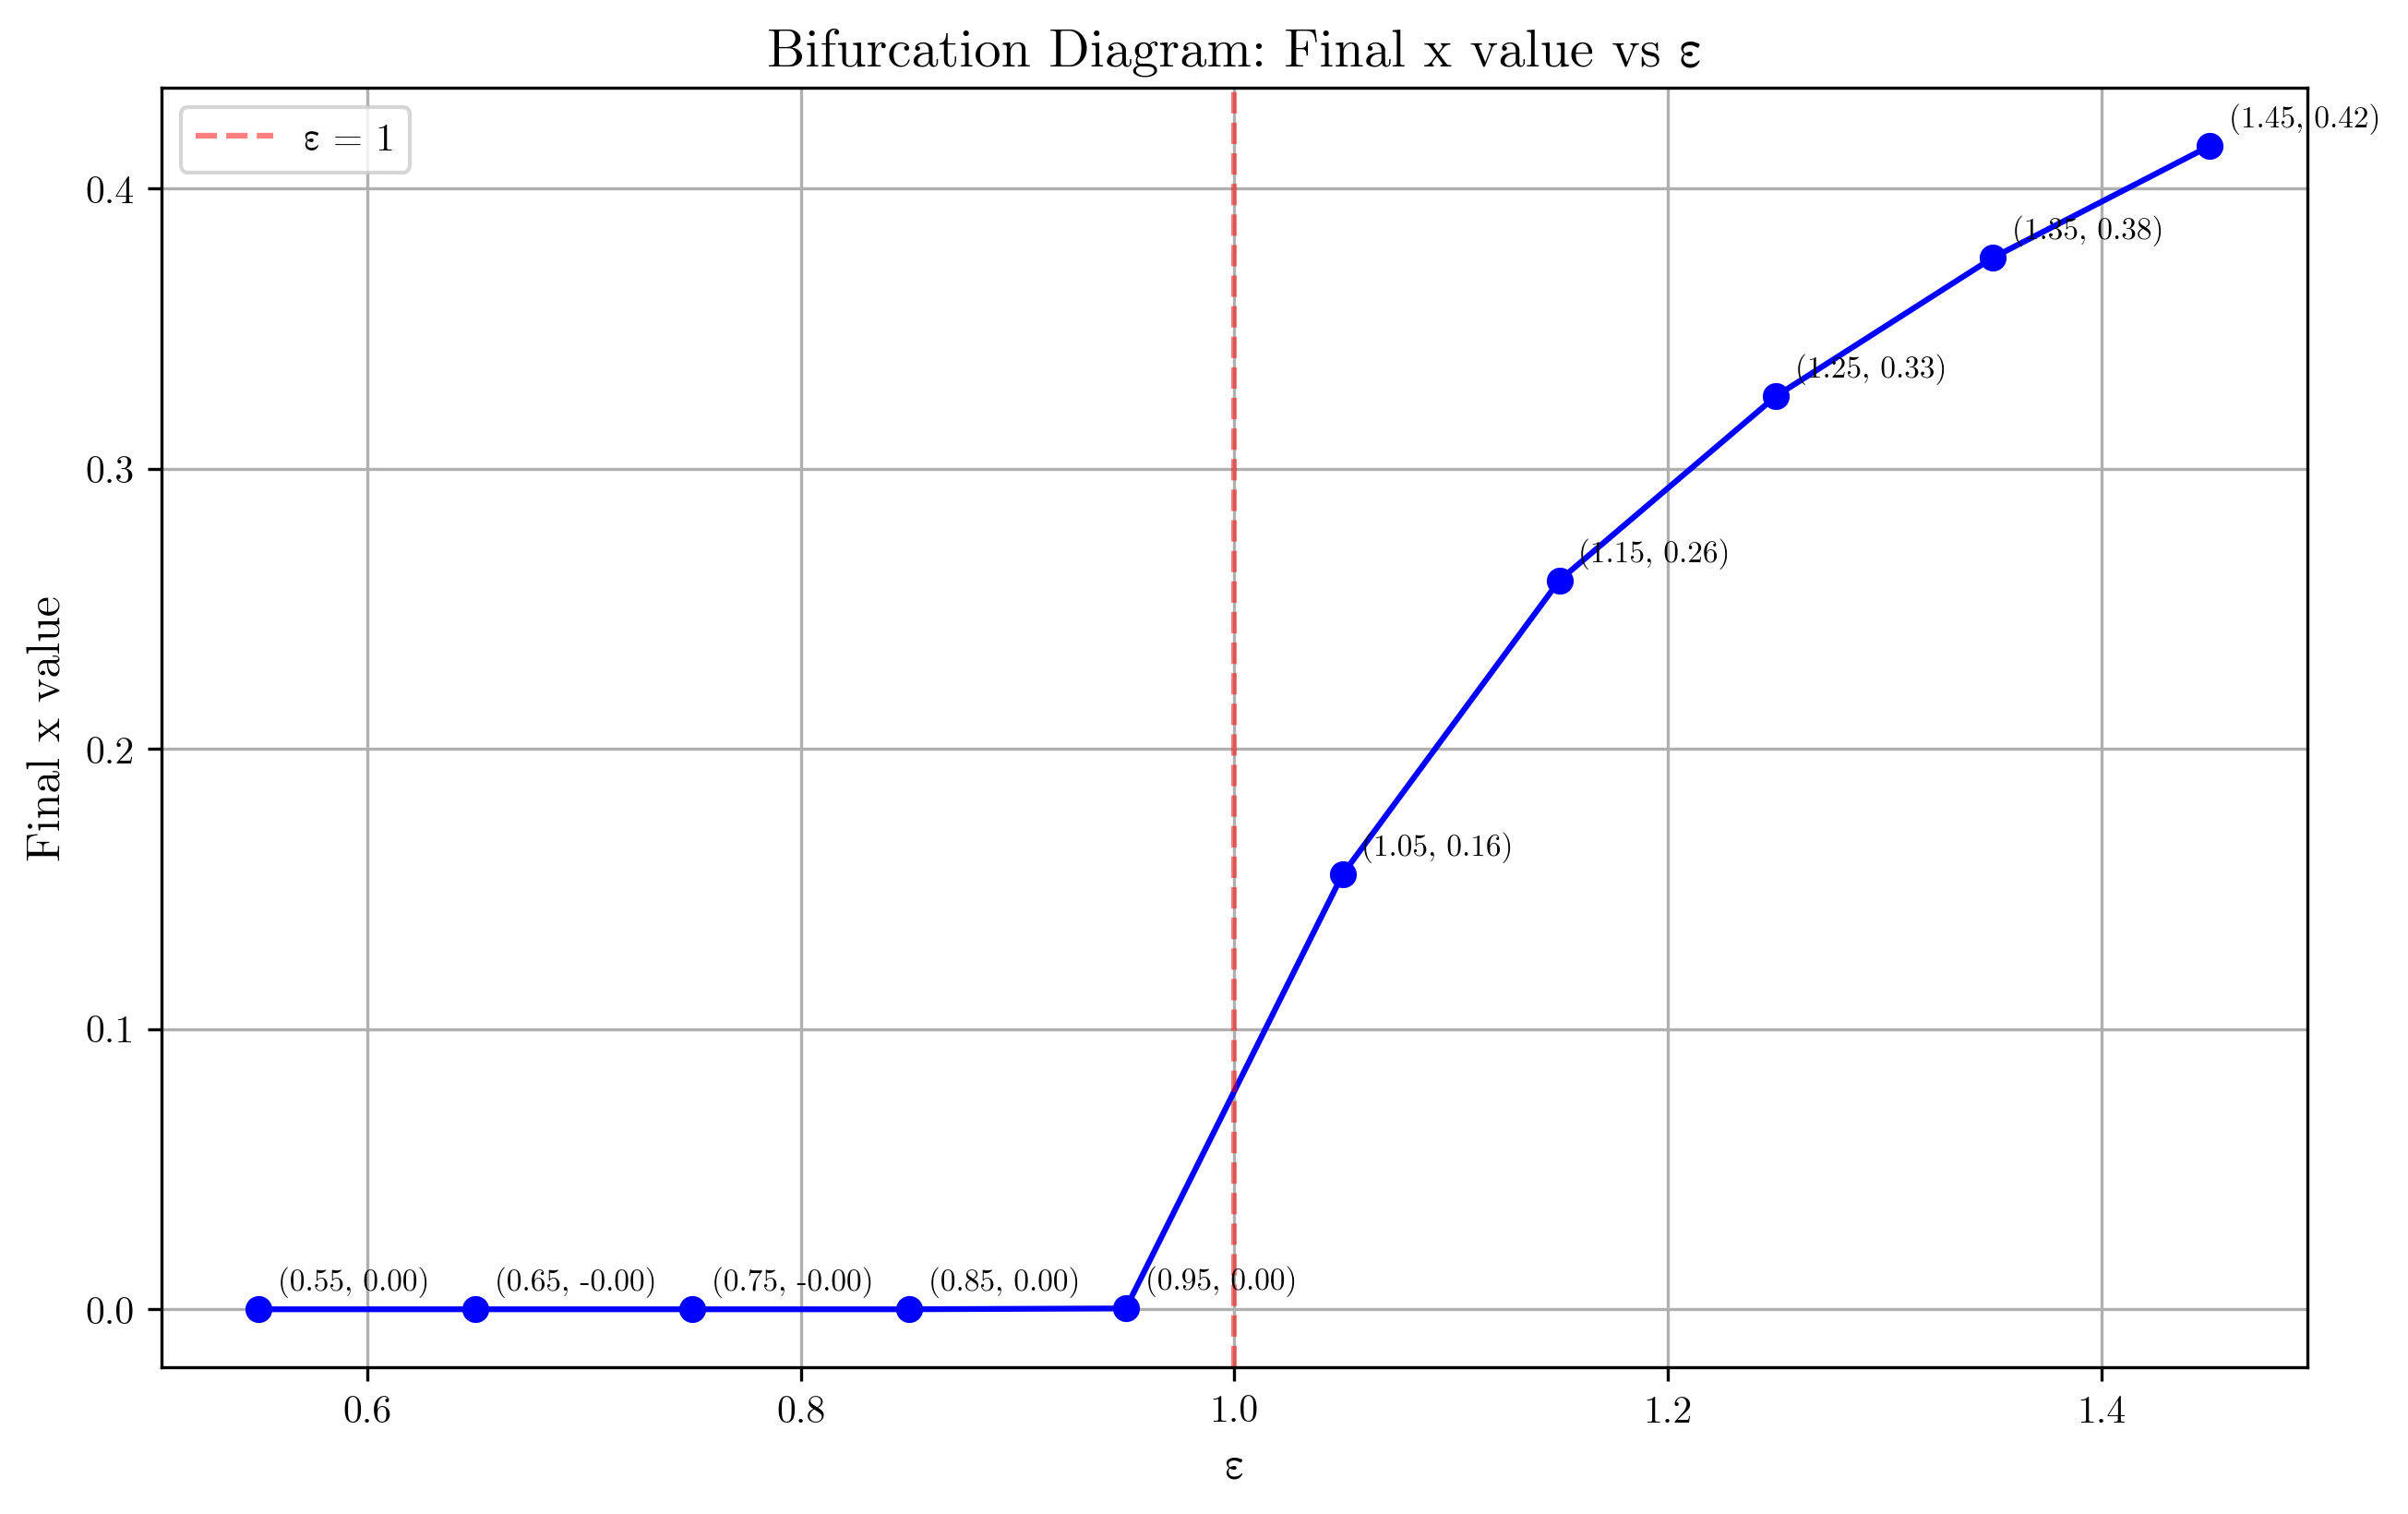

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib as mpl

# Load CMU Serif font from file
font_path = '/Users/harshagrawal/Downloads/misc/fonts/cmu-serif/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['mathtext.fontset'] = 'cm'

# Increase DPI for better quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

def system(state, t, epsilon):
    x, y = state
    dx_dt = y/(1 + x**2) - x
    dy_dt = (epsilon * x)/(1 + y**2) - y
    return [dx_dt, dy_dt]

# Initial conditions
x0 = 0.1
y0 = 0.0
initial_state = [x0, y0]

# Time points
t = np.linspace(0, 200, 1000)

# Epsilon values
epsilon_values = np.array([0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45])

# Store final x values
final_x_values = []

# Simulate for each epsilon value
for epsilon in epsilon_values:
    # Solve ODE
    solution = odeint(system, initial_state, t, args=(epsilon,))
    
    # Store final x value
    final_x = solution[-1, 0]  # First column is x, take last time point
    final_x_values.append(final_x)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, final_x_values, 'bo-')

# Add point labels
for i, (eps, x_val) in enumerate(zip(epsilon_values, final_x_values)):
    plt.annotate(f'({eps:.2f}, {x_val:.2f})', 
                (eps, x_val),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

plt.grid(True)
plt.xlabel('ε', fontsize=12)
plt.ylabel('Final x value', fontsize=12)
plt.title('Bifurcation Diagram: Final x value vs ε', fontsize=14)

# Add vertical line at ε = 1
plt.axvline(x=1, color='r', linestyle='--', alpha=0.5, label='ε = 1')
plt.legend()

plt.show()